In [18]:
import os, shutil

In [19]:
# original data set from kaggle
original_dataset_dir_cat = 'C:/Users/Prabhjyot/Desktop/Data Science_ML/Practice/DL_CatsnDogs/training_set/cats'
original_dataset_dir_dog = 'C:/Users/Prabhjyot/Desktop/Data Science_ML/Practice/DL_CatsnDogs/training_set/dogs'

# path to create a small dataset from the original data set
base_dir = 'C:/Users/Prabhjyot/Desktop/Data Science_ML/Practice/DL_CatsnDogs/Small'
os.mkdir(base_dir)



In [20]:
# Setting directories for Training and Validation

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)


# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [22]:
# Copy first 3000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1,3001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cat, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 1000 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(3001, 4001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_cat, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 3000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1,3001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dog, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 1000 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(3001, 4001)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_dog, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    

In [24]:
# Taking the count of images in Training and validation sets for cats and dogs
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training cat images: 3000
total training dog images: 3000


In [25]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation cat images: 1000
total validation dog images: 1000


In [26]:
# Building the Network. The Convnet is a stack of alternate Conv2D(with Relu activation function) and MaxPooling2D layer. This 
#network
# will reduce the size of feature maps so that they aren't overly sized when they reach the Flatten Layer.The network ends with 
# a sigmoid 
# function that will encode the probability that the network is looking at one class or other.

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [28]:
# Using RMSprop as optimizer. The cost function used is Binary Crossentropy as output is a probability value between 0 and 1.

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [29]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [30]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [31]:
# Fitting the model using fit_generator

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 64s 640ms/step - loss: 0.6852 - acc: 0.5335 - val_loss: 0.6705 - val_acc: 0.5940
Epoch 2/30
100/100 [==============================] - 60s 603ms/step - loss: 0.6683 - acc: 0.5825 - val_loss: 0.6404 - val_acc: 0.6370
Epoch 3/30
100/100 [==============================] - 60s 596ms/step - loss: 0.6468 - acc: 0.6190 - val_loss: 0.6152 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 61s 606ms/step - loss: 0.6096 - acc: 0.6575 - val_loss: 0.6458 - val_acc: 0.6040
Epoch 5/30
100/100 [==============================] - 71s 708ms/step - loss: 0.5923 - acc: 0.6830 - val_loss: 0.5760 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 61s 606ms/step - loss: 0.5750 - acc: 0.6935 - val_loss: 0.5449 - val_acc: 0.7280
Epoch 7/30
100/100 [==============================] - 61s 611ms/step - loss: 0.5593 - acc: 0.7095 - val_loss: 0.5495 - val_acc: 0.7150
Epoch 8

In [34]:
# Saving the model after training

model.save('cats_and_dogs_small_1.h5')

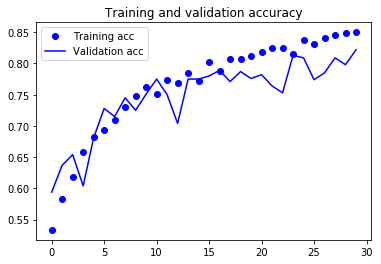

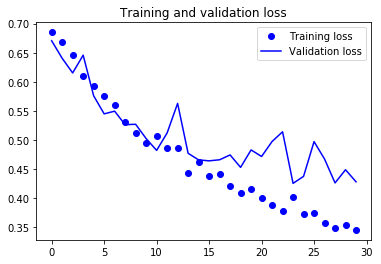

In [36]:
# Plotting the loss and accuracy of the model over the training and validation data 

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# From the plot below we can see that the Training accuracy reaches 85% while validation accuracy is 82%. Also the Training loss
# is 34% while Validation loss is 43%. Now we try to increase the accuracy through data augmentation approach.

In [37]:
# Approach is Data Augmentation. In Keras, we can use ImageDataGenerator for augmenting the samples

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

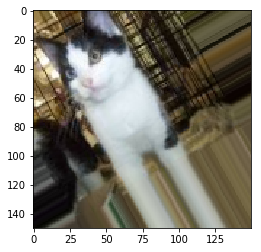

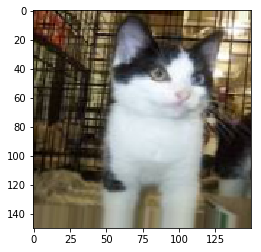

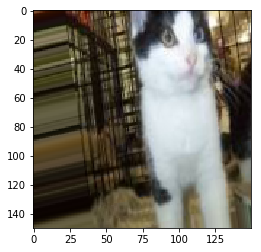

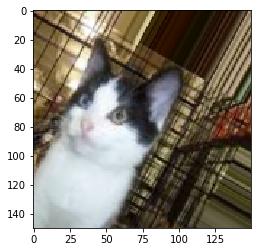

In [38]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [39]:
#  To further fight overfitting, we will also add a Dropout layer to our model, right before the densely-connected classifier:

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
# Training the network using Data augmentation and dropout

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 146s 1s/step - loss: 0.4335 - acc: 0.7891 - val_loss: 0.4354 - val_acc: 0.8200
Epoch 2/100
100/100 [==============================] - 107s 1s/step - loss: 0.4483 - acc: 0.7950 - val_loss: 0.3785 - val_acc: 0.8453
Epoch 3/100
100/100 [==============================] - 92s 925ms/step - loss: 0.4382 - acc: 0.8012 - val_loss: 0.4508 - val_acc: 0.8100
Epoch 4/100
100/100 [==============================] - 96s 959ms/step - loss: 0.4412 - acc: 0.8009 - val_loss: 0.5126 - val_acc: 0.7626
Epoch 5/100
100/100 [==============================] - 95s 952ms/step - loss: 0.4493 - acc: 0.7891 - val_loss: 0.4386 - val_acc: 0.7975
Epoch 6/100
100/100 [==============================] - 102s 1s/step - loss: 0.4461 - acc: 0.7872 - val_loss: 0.4255 - val_acc: 0.8277
Epoch 7/100
100/100 [==============================] - 87s 870ms/step - loss: 0.4292 - acc: 0.8028 - val_l

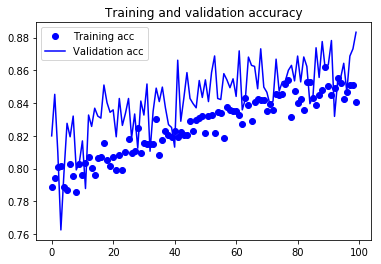

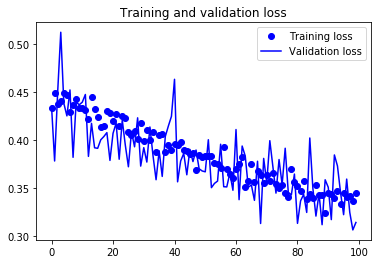

In [45]:
# Saving the model again
model.save('cats_and_dogs_small_2.h5')

# Again plotting the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




In [46]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 2023 images belonging to 2 classes.
test acc: 0.8919999969005584


In [49]:
# Feature extraction by Extending the model (`conv_base`) by adding `Dense` layers on top, 
# and running the whole thing end-to-end on the input data
import keras
keras.__version__

'2.2.4'

In [51]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 829s 14us/step


In [52]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [53]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [55]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [56]:
conv_base.trainable = False

In [57]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [59]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/30
 - 540s - loss: 0.5253 - acc: 0.7620 - val_loss: 0.3863 - val_acc: 0.8490
Epoch 2/30
 - 535s - loss: 0.4521 - acc: 0.7980 - val_loss: 0.3276 - val_acc: 0.8660
Epoch 3/30
 - 562s - loss: 0.4260 - acc: 0.8080 - val_loss: 0.3160 - val_acc: 0.8620
Epoch 4/30
 - 574s - loss: 0.4069 - acc: 0.8090 - val_loss: 0.2840 - val_acc: 0.8760
Epoch 5/30
 - 551s - loss: 0.3727 - acc: 0.8340 - val_loss: 0.2754 - val_acc: 0.8830
Epoch 6/30
 - 555s - loss: 0.3895 - acc: 0.8285 - val_loss: 0.3267 - val_acc: 0.8500
Epoch 7/30
 - 538s - loss: 0.3674 - acc: 0.8440 - val_loss: 0.2862 - val_acc: 0.8830
Epoch 8/30
 - 535s - loss: 0.3691 - acc: 0.8315 - val_loss: 0.2633 - val_acc: 0.8860
Epoch 9/30
 - 545s - loss: 0.3545 - acc: 0.8485 - val_loss: 0.2476 - val_acc: 0.8960
Epoch 10/30
 - 526s - loss: 0.3516 - acc: 0.8500 - val_loss: 0.2580 - val_acc: 0.8920
Epoch 11/30
 - 506s - loss: 0.3479 - acc: 0.8465 - val_loss: 0.25

In [60]:
model.save('cats_and_dogs_small_3.h5')

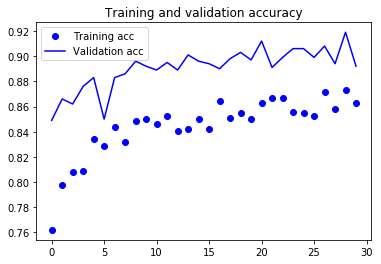

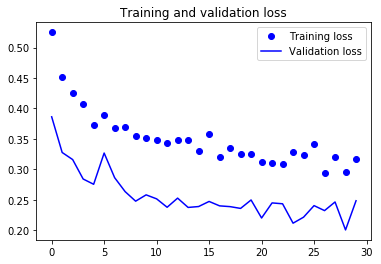

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [62]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 2023 images belonging to 2 classes.
test acc: 0.8969999992847443
